# Amazon Product Review - Sentiment Analysis

### Importing the necessary modules

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Dataset 

In [48]:
## Loading the dataset and checking the top 5 columns of the data

Data = pd.read_csv("amazon.csv")
Data.head()

C:\Users\Dhamodharan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


### Describing the Dataset

In [49]:
## Getting the Mean, Median, Std. Deviation and Quartiles in the data

Data.describe()

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,1.0,34131.000000,34627.000000,0.0,0.0
mean,111372787.0,0.630248,4.584573,NaN,NaN
std,NaN,13.215775,0.735653,NaN,NaN
min,111372787.0,0.000000,1.000000,NaN,NaN
25%,111372787.0,0.000000,4.000000,NaN,NaN
50%,111372787.0,0.000000,5.000000,NaN,NaN
75%,111372787.0,0.000000,5.000000,NaN,NaN
max,111372787.0,814.000000,5.000000,NaN,NaN


In [50]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
id                      34660 non-null object
name                    27900 non-null object
asins                   34658 non-null object
brand                   34660 non-null object
categories              34660 non-null object
keys                    34660 non-null object
manufacturer            34660 non-null object
reviews.date            34621 non-null object
reviews.dateAdded       24039 non-null object
reviews.dateSeen        34660 non-null object
reviews.didPurchase     1 non-null object
reviews.doRecommend     34066 non-null object
reviews.id              1 non-null float64
reviews.numHelpful      34131 non-null float64
reviews.rating          34627 non-null float64
reviews.sourceURLs      34660 non-null object
reviews.text            34659 non-null object
reviews.title           34655 non-null object
reviews.userCity        0 non-null float64
reviews.userProvince    0

In [51]:
## Checking for the Missing values in all columns of dataset

Data.isnull().sum()

id                          0
name                     6760
asins                       2
brand                       0
categories                  0
keys                        0
manufacturer                0
reviews.date               39
reviews.dateAdded       10621
reviews.dateSeen            0
reviews.didPurchase     34659
reviews.doRecommend       594
reviews.id              34659
reviews.numHelpful        529
reviews.rating             33
reviews.sourceURLs          0
reviews.text                1
reviews.title               5
reviews.userCity        34660
reviews.userProvince    34660
reviews.username            2
dtype: int64

In [52]:
## Getting the unique values from the 'asins' (Product) listed in the dataset 

Data["asins"].unique()

array(['B01AHB9CN2', 'B00VINDBJK', 'B005PB2T0S', 'B002Y27P3M',
       'B01AHB9CYG', 'B01AHB9C1E', 'B01J2G4VBG', 'B00ZV9PXP2',
       'B0083Q04TA', 'B018Y229OU', 'B00REQKWGA', 'B00IOYAM4I',
       'B018T075DC', nan, 'B00DU15MU4', 'B018Y225IA', 'B005PB2T2Q',
       'B018Y23MNM', 'B00OQVZDJM', 'B00IOY8XWQ', 'B00LO29KXQ',
       'B00QJDU3KY', 'B018Y22C2Y', 'B01BFIBRIE', 'B01J4ORNHU',
       'B018SZT3BK', 'B00UH4D8G2', 'B018Y22BI4', 'B00TSUGXKE',
       'B00L9EPT8O,B01E6AO69U', 'B018Y23P7K', 'B00X4WHP5E', 'B00QFQRELG',
       'B00LW9XOJM', 'B00QL1ZN3G', 'B0189XYY0Q', 'B01BH83OOM',
       'B00BFJAHF8', 'B00U3FPN4U', 'B002Y27P6Y', 'B006GWO5NE',
       'B006GWO5WK'], dtype=object)

In [53]:
len(Data["asins"].unique())

42

### Visualizing the Numerical categories in the dataset

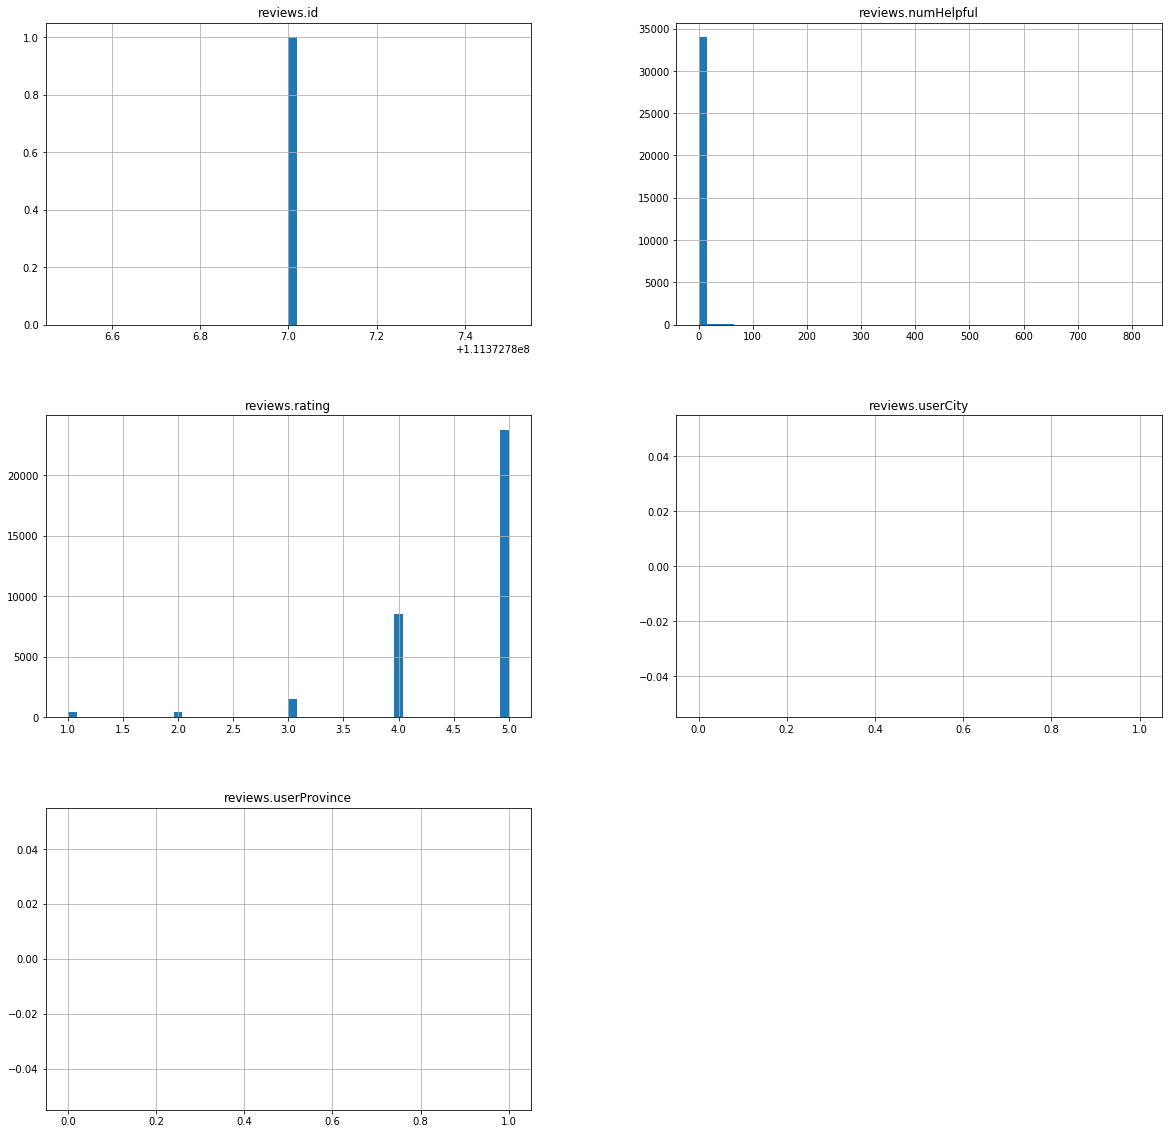

In [54]:
## Visualization of the data will help in finding the outliers in the data

Data.hist(bins=50, figsize=(20,20))
plt.show()

## Data Exploration

## Stratified Sampling - Test and Train split

In [64]:
## Stratified sampling
## It is clear from the data visualization that the 5 star rating for the reviews is double the value of the other ratings combined
## In order to avoid the class imbalance in the test, train split, we are using the stratified sampling

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=5, test_size= 0.3)
for train_index, test_index in split.split(after,after["reviews.rating"]):
    train = after.reindex(train_index)
    test = after.reindex(test_index)

In [60]:
## Count of the total data points in the dataset 

print("Count with NA's: ", len(Data))

Count with NA's:  34660


In [61]:
## Dropping the data points with the NA values in the 'reviwes.rating' column

after = Data.dropna(subset=["reviews.rating"])
print("Count without NA's: ", len(after))

Count without NA's:  34627


In [63]:
## Converting the review rating column from float to integer type

after['reviews.rating'] = after["reviews.rating"].astype(int)

C:\Users\Dhamodharan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [66]:
print(len(train))
print(len(test))

print(test["reviews.rating"].value_counts()/len(test))

24238
10389
5.0    0.688998
4.0    0.245452
3.0    0.042352
2.0    0.011647
1.0    0.010396
Name: reviews.rating, dtype: float64


In [67]:
train.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
16335,AVqVGWLKnnc1JgDc3jF1,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",B018Y23MNM,Amazon,"Tablets,Fire Tablets,Computers & Tablets,All T...",firekidseditiontablet7displaywifi16gbgreenkidp...,Amazon,2017-01-06T00:00:00.000Z,2017-06-21T07:37:51Z,"2017-06-04T02:16:49.239Z,2017-06-03T18:41:19.975Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5026300/review...,I love the amazon fire kids edition. It has lo...,"Perfect tablet for my kids, nephew and nieces.",NaN,NaN,femochie
11824,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-06-17T00:00:00.000Z,2017-05-21T03:00:16Z,"2017-04-30T00:20:00.000Z,2017-06-07T08:18:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5025800/review...,"Bought for a gift, very good for a young child...",Good tablet for the price,NaN,NaN,Rochelle
10856,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-01-29T00:00:00.000Z,2017-05-21T02:27:51Z,"2017-04-30T00:17:00.000Z,2017-06-07T08:13:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5025800/review...,Got this for my granddaughter. It is perfect f...,great tablet,NaN,NaN,nanapeg
18394,AV1YnRtnglJLPUi8IJmV,Amazon Kindle Paperwhite - eBook reader - 4 GB...,B00OQVZDJM,Amazon,"Walmart for Business,Office Electronics,Tablet...","amazon/b00oqvzdjm,848719056099,amazonkindlepap...",Amazon,2016-03-25T00:00:00.000Z,2017-09-05T22:09:30Z,"2017-08-31T22:33:47.360Z,2017-08-02T19:52:21.5...",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/9439005/review...,We purchased two Paperwhite's and gave one to ...,Amazon Paperwhite,NaN,NaN,safetyspeaking
26841,AVpfl8cLLJeJML43AE3S,"Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,","B00L9EPT8O,B01E6AO69U",Amazon,"Stereos,Remote Controls,Amazon Echo,Audio Dock...","echowhite/263039693056,echowhite/152558276095,...",Amazon,2017-01-17T00:00:00.000Z,NaN,"2017-09-28T00:00:00Z,2017-09-08T00:00:00Z,2017...",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5588528/review...,I absolutely love the Echo! I tell Alexa what ...,Love the Echo!!,NaN,NaN,yzfmik


In [69]:
## Checking to see if two values of 'asins' have same value in 'name' column

print(len(train["name"].unique()), len(train["asins"].unique()))
print(train.info())

## Since it is clear that the same asins have multiple values in 'name' column, we are focusing on unique values based on 'asins' column
print(train.groupby("asins")["name"].unique())

44 36
<class 'pandas.core.frame.DataFrame'>
Int64Index: 24238 entries, 16335 to 20599
Data columns (total 21 columns):
id                      24217 non-null object
name                    19529 non-null object
asins                   24217 non-null object
brand                   24217 non-null object
categories              24217 non-null object
keys                    24217 non-null object
manufacturer            24217 non-null object
reviews.date            24200 non-null object
reviews.dateAdded       16810 non-null object
reviews.dateSeen        24217 non-null object
reviews.didPurchase     1 non-null object
reviews.doRecommend     23856 non-null object
reviews.id              1 non-null float64
reviews.numHelpful      23899 non-null float64
reviews.rating          24217 non-null float64
reviews.sourceURLs      24217 non-null object
reviews.text            24216 non-null object
reviews.title           24215 non-null object
reviews.userCity        0 non-null float64
reviews.userPro

## Sentimenatal Analysis

In [70]:
## With the 'rating' feature in the dataset, we have built the sentimental analysis classfier 

def sentiments(rating):
    if(rating == 5) or (rating == 4):
        return "Positive"
    elif rating == 3:
        return "Neutral"
    elif (rating == 2) or (rating == 1):
        return "Negative"

train["Sentiment"] = train["reviews.rating"].apply(sentiments)
test["Sentiment"] = test["reviews.rating"].apply(sentiments)

print(train["Sentiment"][:10])
    

16335    Positive
11824    Positive
10856    Positive
18394    Positive
26841    Positive
17367    Positive
31104    Positive
19098    Positive
20671    Positive
12849    Positive
Name: Sentiment, dtype: object
